###################################
##    뉴스 기사 워드 클라우드   ##
###################################

0. 라이브러리 임포트

In [6]:
import requests
from bs4 import BeautifulSoup
import re
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

1. 뉴스 기사 제목 500개 크롤링

In [7]:
query = '엔비디아'
page = 0
title_list = []

# User-Agent 설정
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Accept-Language': 'ko-KR,ko;q=0.9',
    'Accept-Encoding': 'gzip, deflate, br',
    'Connection': 'keep-alive'
}

for i in range(0, 50):
    page += 1
    url = f'https://search.daum.net/search?w=news&nil_search=btn&DA=STC&enc=utf8&cluster=y&cluster_page=1&q={query}&p={page}&sort=recency'
    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        title_elements = soup.find_all(class_='tit-g clamp-g')
        for title_element in title_elements:
            title_list.append(title_element.get_text())
    else:
        print("웹 페이지를 가져오는 데 실패했습니다.")

print(title_list)
print(len(title_list))

['  [자막뉴스] 뉴욕증시 주요 3대 지수 급락...엔비디아, 폭락 역사상 가장 큰 하루 손실액  ', '  [전국 주요 신문 톱뉴스](4일 석간)  ', '  연차보고서 제출 지연에 ‘공매도 타깃’ 된 슈퍼마이크로… “사실무근, 사업 문제 없다”  ', '  외국인에 기관까지 팔자 행렬···‘7만전자’ 무너질까 촉각 [오후 시황]  ', '  SK하이닉스 “HBM3E 품질 경쟁력 차세대로 이어갈 것”  ', "  바이브컴퍼니, HPE·엔비디아 공동 주최 'HPE AI@HYPERSCALE 2024' 행사 참여  ", '  [특징주] 엔비디아 10% 급락에… 한·일·대만 반도체주 줄하락  ', '  구글 잡겠다는 퍼플렉시티 CEO…한국으로 날아온 이유는?  ', '  [김대호의 경제읽기] 경기 침체 우려 재점화…뉴욕증시 급락 마감  ', '  “SKT 고객은 1년 16만원 ‘퍼플렉시티 프로’ AI검색 무료”[일문일답]  ', '  ‘엔비디아’ 국내 투자자 10명 중 4명 손실…‘애플·메타’는 99% 수익권  ', '  "주식계좌 녹는다" 개미들 비명…장중 2600선 붕괴, 증권가 시각은  ', '  美 증시 폭락에, 아시아 증시 동반 하락...코스피 -2.9%, 닛케이 -3.6%  ', "  '6만' 터치 삼성전자, 반도체주 '휘청'...엔비디아 폭락 언제까지?  ", '  미 경기 둔화 우려에 뉴욕 증시 급락…엔비디아, 9.5% 폭락  ', '  SK하이닉스 7% 급락하는 등 亞반도체주 일제 급락  ', '  ‘반독점 조사’ 소환장 받은 엔비디아… “실력으로 시장서 승리한 것” 반박에도 주가 약세  ', '  아증시 일제 급락, 비트코인도 5% 급락…5.6만달러 붕괴(상보)  ', '  재발한 경기불안 제물된 엔비디아…반도체株 호시절 가나  ', "  '한달 전 데자뷰' 美여파에 亞지수 동반 급락…반도체주 '울상'(종합)  ", "  '엔비디아 쇼크' 일본·대만증시 3%대 급락 [Asia오전]  ", '  미국 제조업 지수·GDP 수치 저조… 투매 행렬에 나

2. 뉴스 기사 제목 전처리

In [8]:
pattern = r'[^a-zA-Z0-9\u4e00-\u9fff가-힣\s.%]'
regex_title = [re.sub(pattern, '', title) for title in title_list]
print(regex_title)

['  자막뉴스 뉴욕증시 주요 3대 지수 급락...엔비디아 폭락 역사상 가장 큰 하루 손실액  ', '  전국 주요 신문 톱뉴스4일 석간  ', '  연차보고서 제출 지연에 공매도 타깃 된 슈퍼마이크로 사실무근 사업 문제 없다  ', '  외국인에 기관까지 팔자 행렬7만전자 무너질까 촉각 오후 시황  ', '  SK하이닉스 HBM3E 품질 경쟁력 차세대로 이어갈 것  ', '  바이브컴퍼니 HPE엔비디아 공동 주최 HPE AIHYPERSCALE 2024 행사 참여  ', '  특징주 엔비디아 10% 급락에 한일대만 반도체주 줄하락  ', '  구글 잡겠다는 퍼플렉시티 CEO한국으로 날아온 이유는  ', '  김대호의 경제읽기 경기 침체 우려 재점화뉴욕증시 급락 마감  ', '  SKT 고객은 1년 16만원 퍼플렉시티 프로 AI검색 무료일문일답  ', '  엔비디아 국내 투자자 10명 중 4명 손실애플메타는 99% 수익권  ', '  주식계좌 녹는다 개미들 비명장중 2600선 붕괴 증권가 시각은  ', '  美 증시 폭락에 아시아 증시 동반 하락...코스피 2.9% 닛케이 3.6%  ', '  6만 터치 삼성전자 반도체주 휘청...엔비디아 폭락 언제까지  ', '  미 경기 둔화 우려에 뉴욕 증시 급락엔비디아 9.5% 폭락  ', '  SK하이닉스 7% 급락하는 등 亞반도체주 일제 급락  ', '  반독점 조사 소환장 받은 엔비디아 실력으로 시장서 승리한 것 반박에도 주가 약세  ', '  아증시 일제 급락 비트코인도 5% 급락5.6만달러 붕괴상보  ', '  재발한 경기불안 제물된 엔비디아반도체株 호시절 가나  ', '  한달 전 데자뷰 美여파에 亞지수 동반 급락반도체주 울상종합  ', '  엔비디아 쇼크 일본대만증시 3%대 급락 Asia오전  ', '  미국 제조업 지수GDP 수치 저조 투매 행렬에 나스닥은 3% 하락  ', '  한달만에 또 미국 침체 공포 코스피 반도체주 도미노 하락  ', '  인텔의 굴욕주가 폭락에 미국 다우지수서 탈락 위기  ', '

3. 형태소 분석

In [9]:
okt = Okt()

nouns_list = []
for title in regex_title:
  nouns = okt.nouns(title)
  english_nouns = re.findall(r'[a-zA-Z]+', title)
  
  nouns_list.extend(nouns)
  nouns_list.extend(english_nouns)

nouns_list = [noun for noun in nouns_list if len(noun) >= 2 and noun != query]    

print(nouns_list)

['자막', '뉴스', '뉴욕증시', '주요', '지수', '급락', '폭락', '역사상', '가장', '하루', '손실', '전국', '주요', '신문', '톱뉴스', '석간', '연차', '보고서', '제출', '지연', '공매도', '타깃', '슈퍼', '마이크로', '사실', '무근', '사업', '문제', '외국인', '기관', '팔자', '행렬', '촉각', '오후', '하이닉스', '품질', '경쟁력', '차세대', 'SK', 'HBM', '바이브', '컴퍼니', '공동', '주최', '행사', '참여', 'HPE', 'HPE', 'AIHYPERSCALE', '특징', '급락', '대만', '반도체', '하락', '구글', '퍼플', '시티', '한국', '이유', 'CEO', '김대호', '경제', '경기', '침체', '우려', '점화', '뉴욕증시', '급락', '마감', '고객', '퍼플', '시티', '프로', '검색', '무료', '일문일답', 'SKT', 'AI', '국내', '투자자', '손실', '애플', '메타', '수익권', '주식', '계좌', '개미', '비명', '붕괴', '증권', '시각', '증시', '폭락', '아시아', '증시', '동반', '하락', '코스피', '케이', '터치', '삼성', '전자', '반도체', '폭락', '언제', '경기', '둔화', '우려', '뉴욕', '증시', '급락', '폭락', '하이닉스', '급락', '반도체', '일제', '급락', 'SK', '독점', '조사', '소환장', '실력', '시장', '승리', '반박', '주가', '약세', '증시', '일제', '급락', '비트코인', '급락', '붕괴', '상보', '재발', '경기', '불안', '제물', '반도체', '호시절', '가나', '데자뷰', '여파', '지수', '동반', '급락', '반도체', '울상', '종합', '쇼크', '일본', '대만', '증시', '급락', '오전', 'Asia', '미국', '제조업

4. Word Cloud

'엔비디아'의 TOP5 연관 검색어 : AI, 급락, 반도체, 폭락, 삼성


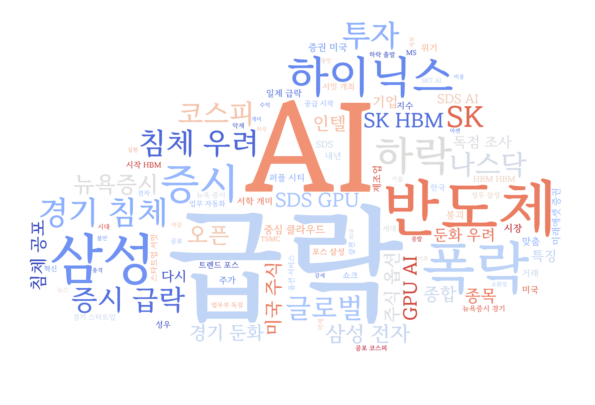

In [10]:
text = ' '.join(nouns_list)
image_mask = np.array(Image.open('D:/TJ_FInal_Project/KDJ/Word_cloud/image/cloud_mask.png'))
image_mask = 255 - image_mask

wordcloud = WordCloud(font_path='D:/TJ_FInal_Project/KDJ/Word_cloud/font/MaruBuri-SemiBold.ttf',
                      width=1600, height=1200,
                      background_color='white',
                      colormap='coolwarm',
                      mask=image_mask,
                      max_words=100,
                      scale=4.0).generate(text)

top_5_words = list(wordcloud.words_.keys())
top_5_words = [word for word in top_5_words if word.replace(" ", "") != query][:5]
top_5_words = ', '.join(top_5_words)
print(f"'{query}'의 TOP5 연관 검색어 : {top_5_words}")

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

wordcloud.to_file('D:/TJ_FInal_Project/KDJ/Word_cloud/image/wordcloud.png')